### SI618 Final Report

Group member - uniquename:
1. applehu
2. yuci
3. congxiao

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_listing = pd.read_csv('listings.csv')
df_listing.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,65467,https://www.airbnb.com/rooms/65467,20221206172243,2022-12-07,city scrape,A Luxury Home in Los Angeles,<b>The space</b><br />Private 16 x 15 ft room ...,NaN,https://a0.muscache.com/pictures/821696/64d8a6...,61864,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
1,206662,https://www.airbnb.com/rooms/206662,20221206172243,2022-12-07,city scrape,"Hollywood & Hiking, 30 day minimum","Semi-Private, vaccinated only, you will be sta...",The quietest part of Hollywood yet still walka...,https://a0.muscache.com/pictures/30274679/5011...,33861,...,4.92,4.92,4.87,NaN,f,1,0,1,0,0.71
2,67089,https://www.airbnb.com/rooms/67089,20221206172243,2022-12-07,city scrape,Tranquil Guesthouse Oasis with a Hot Tub,Relax in a hammock or hot tub in a secluded ba...,The bungalow sits behind the main house down t...,https://a0.muscache.com/pictures/87cd0874-9acc...,210344,...,4.94,4.91,4.87,NaN,f,2,2,0,0,4.80
3,210489,https://www.airbnb.com/rooms/210489,20221206172243,2022-12-07,city scrape,3br 3ba townhome near Beverly Hills,"Beverly Hills area, very safe, quiet and centr...",Great neighborhood! Two blocks to Beverly Hil...,https://a0.muscache.com/pictures/7589741/7e3fc...,76111,...,4.93,4.43,4.64,Exempt - This listing is a transient occupancy...,f,2,1,1,0,0.14
4,109,https://www.airbnb.com/rooms/109,20221206172243,2022-12-07,city scrape,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,...,4.00,5.00,4.00,NaN,f,1,1,0,0,0.01


### Data Process

In [4]:
# 1. Drop unuserful columns
df_listing.drop(['listing_url', 'scrape_id', 'last_scraped', 'name',
       'description', 'neighborhood_overview', 'picture_url', 
       'host_url', 'host_since', 'host_location', 'host_about',
       'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
        'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped',
       'number_of_reviews_ltm', 'number_of_reviews_l30d','license',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms']
       , inplace = True, axis = 1)
df_listing.head()

,id,source,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_cleansed,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,65467,city scrape,61864,Olivier,within a few hours,75%,86%,f,6.0,Culver City,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
1,206662,city scrape,33861,Kevin,within a few hours,75%,38%,t,1.0,Hollywood Hills West,...,2022-08-11,4.82,4.80,4.76,4.89,4.92,4.92,4.87,f,0.71
2,67089,city scrape,210344,Brenna,within a day,94%,91%,t,2.0,Culver City,...,2022-11-23,4.92,4.95,4.91,4.94,4.94,4.91,4.87,f,4.80
3,210489,city scrape,76111,Joy,NaN,NaN,NaN,f,2.0,Pico-Robertson,...,2019-08-22,4.57,4.57,4.50,4.93,4.93,4.43,4.64,f,0.14
4,109,city scrape,521,Paolo,NaN,NaN,NaN,f,1.0,Culver City,...,2016-05-15,4.00,5.00,5.00,3.00,4.00,5.00,4.00,f,0.01


#### Listings data Process

In [5]:
# 2. Process Data
# 1). host_response_time
# Convert null value to Unknown type and and convert response_time to categorical variable
df_listing['host_response_time'] = df_listing['host_response_time'].fillna('Unknown')
display(df_listing['host_response_time'].isnull().sum())
categories = pd.Categorical(df_listing['host_response_time'], categories = \
                                      ['Unknown','a few days or more',
                                       'within a day', 'within a few hours', 
                                       'within an hour'], ordered=True)
df_listing['host_response_time_cate'] = pd.Series(categories, name='host_response_time')
display(df_listing['host_response_time_cate'].head())
# 2). host_response_rate
# Convert host_response_rate to double format
df_listing['host_response_rate_convert'] = df_listing.host_response_rate.str.strip('%').astype(float) / 100
# Fill host_listings_count null by mean value
df_listing.host_response_rate_convert.fillna(df_listing.host_response_rate_convert.mean(), 
                                             inplace = True)
# Cut response rate, the rate lower than 0.5 is low, 
# no less than 0.5 and lower than 0.9 is medium, and greater than 0.9 is high
df_listing['cut_reponse_rate'] = pd.cut(df_listing['host_response_rate_convert'], 
                                        bins = [0, 0.5, 0.9, 1], 
                                        labels=['low', 'medium', 'high'])
display(df_listing['cut_reponse_rate'].head())
# 3). price
# Process price(has no null value), remove '$' and ',' and convert it to float format
display(df_listing['price'].isnull().sum())
if df_listing['price'].dtype != 'object':
    df_listing['price'] = df_listing['price'].astype(str)
df_listing['price'] = df_listing.price.str.replace("$", "").str.replace(",", "").astype(float)
display(df_listing['price'].head())
# 4) Create a new variable: count_amenitites - count the number of amenity every listng provide
temp_count = []
count_amenitites = []
for listing in df_listing.amenities:
    temp_count = 0
    temp = listing.split(",")
    for amenity in temp:
        temp_count += 1
    count_amenitites.append(temp_count)


0

0    within a few hours
1    within a few hours
2          within a day
3               Unknown
4               Unknown
Name: host_response_time_cate, dtype: category
Categories (5, object): ['Unknown' < 'a few days or more' < 'within a day' < 'within a few hours' < 'within an hour']

0    medium
1    medium
2      high
3      high
4      high
Name: cut_reponse_rate, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

0

C:\Users\APPLE\AppData\Local\Temp\ipykernel_6696\3181661272.py:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_listing['price'] = df_listing.price.str.replace("$", "").str.replace(",", "").astype(float)


0    300.0
1     46.0
2    140.0
3    340.0
4    115.0
Name: price, dtype: float64

### Visualization

#### Host View

##### What is the relationship between the room type of Airbnb and their location?

Total Null Value of 'room_type': 0


Entire home/apt    28317
Private room       11253
Shared room          784
Hotel room            84
Name: room_type, dtype: int64

Total Null Value of 'room_type': 0


neighbourhood_group_cleansed,City of Los Angeles,Other Cities,Unincorporated Areas
room_type,,,
Entire home/apt,15246,10614,2457
Hotel room,26,58,0
Private room,5162,4846,1245
Shared room,569,184,31


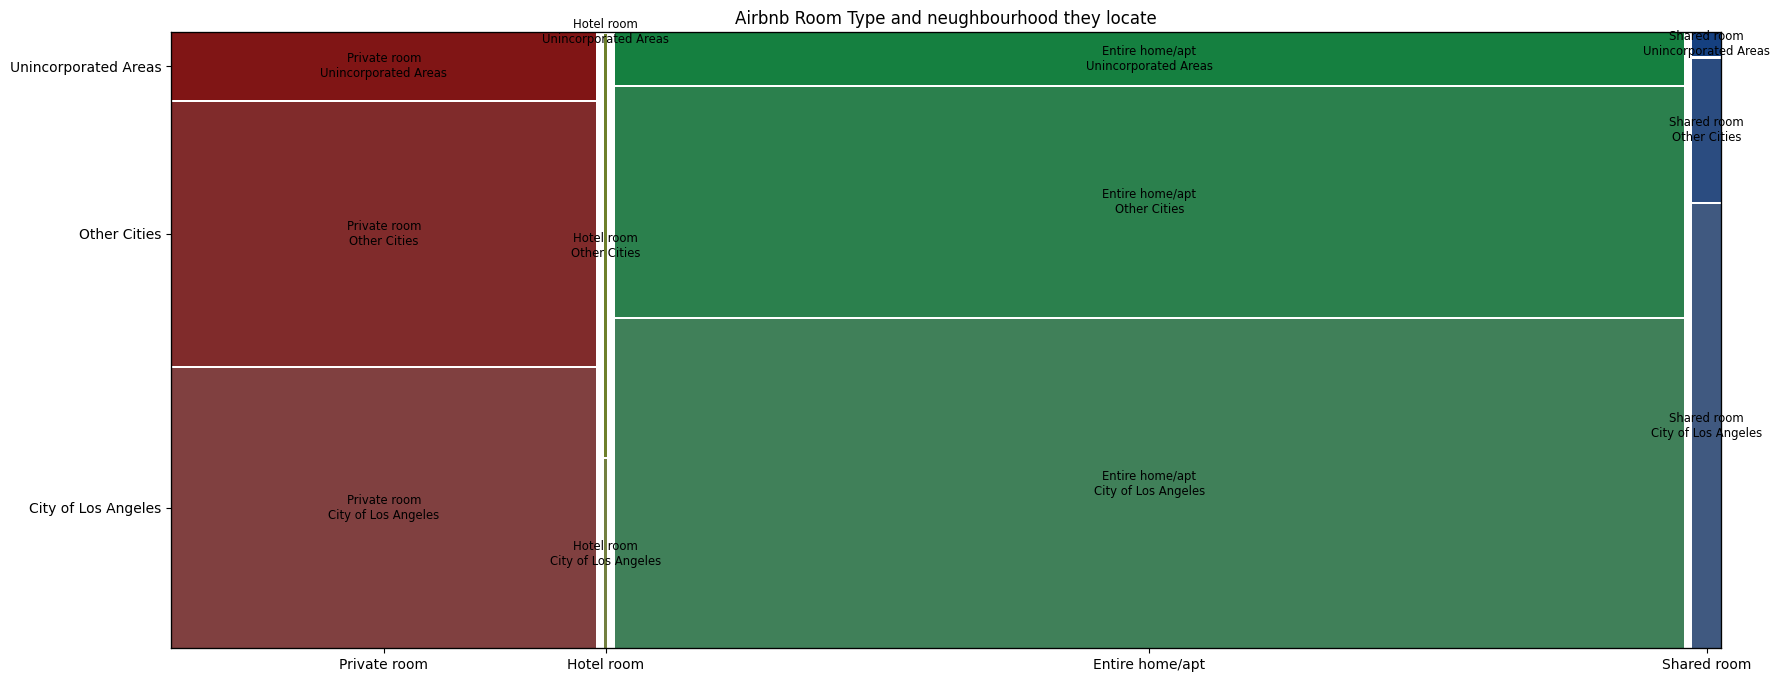

In [6]:
# Room type
# This variales has no null value
print("Total Null Value of 'room_type':", df_listing.room_type.isnull().sum())
# The room type basic distribution
display(df_listing.room_type.value_counts())
# Room Location
# This variales has no null value
print("Total Null Value of 'room_type':", df_listing.neighbourhood_group_cleansed.isnull().sum())
df_listing.neighbourhood_group_cleansed.value_counts()
# Combine them
from statsmodels.graphics.mosaicplot import mosaic
display(pd.crosstab(index = df_listing.room_type, columns = df_listing.neighbourhood_group_cleansed))
# In order to avoid crowding together variables with a small proportion of images, we adjust the drawing order
roomtype_order = ['Private room', 'Hotel room', 'Entire home/apt', 'Shared room']
df_listing["room_type"] = pd.Categorical(df_listing['room_type'], categories = roomtype_order, ordered=True)
fig, ax = plt.subplots(figsize=(20,8))
t = mosaic(df_listing, ['room_type', 'neighbourhood_group_cleansed'], 
           title='Airbnb Room Type and neughbourhood they locate', ax = ax)



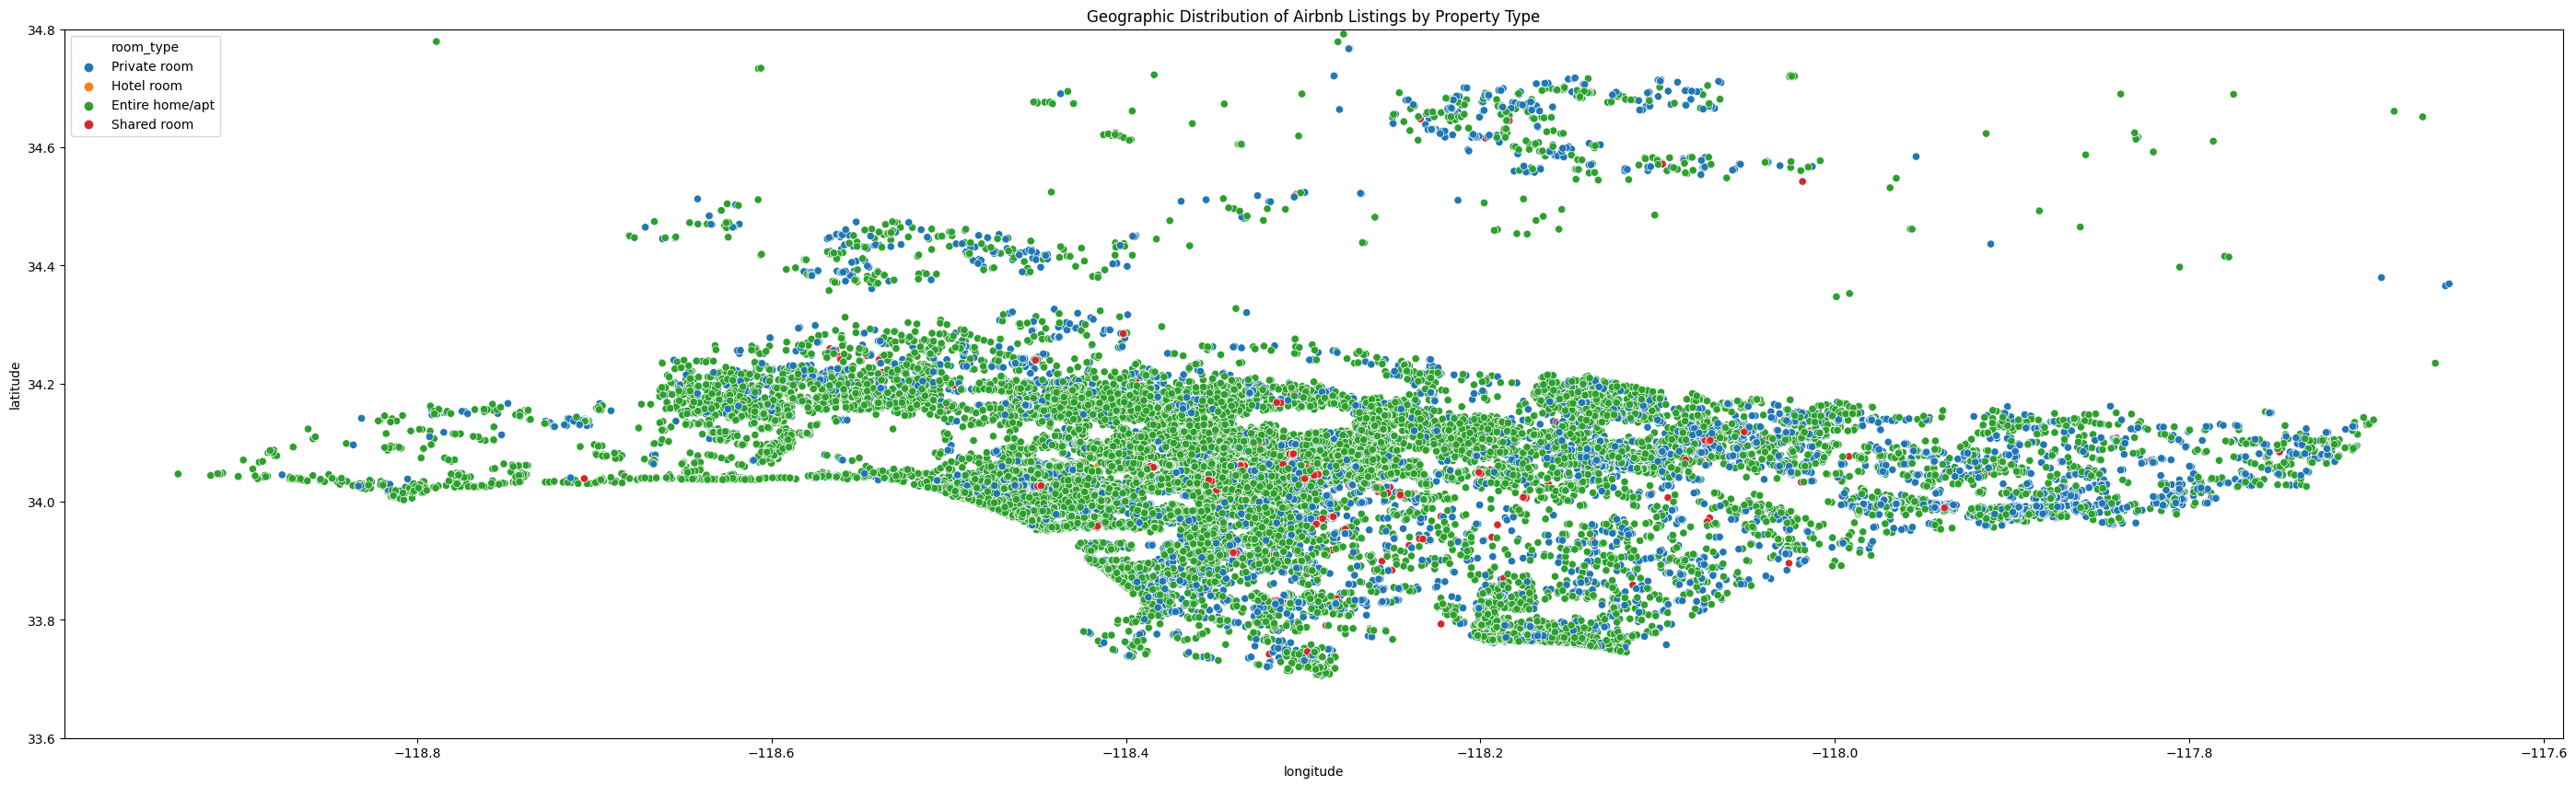

In [89]:
plt.figure(figsize=(35, 10))
sns.scatterplot(data= df_listing, x = 'longitude', y = 'latitude', 
                hue = 'room_type')
plt.ylim(33.6, 34.8)
plt.title('Geographic Distribution of Airbnb Listings by Property Type')
plt.show()

Analysis: 
- From the picture, we find that Entire home/apt take greatest propotion of room_type, then is the Private room while Shared room and Hotel room take only very small proportion of room type. In this fact, we could infer that most of hosts prefer provide user a private enviroment, this also reflect that users regard privacy as a very important factor in their choice of Airbnb when they go to Los Angeles.
- In addition, all types of rooms have a same character of their location. Most of them locate in the city of Los Angeles while there are also quite a few located in other cities. The specific analysis of what cities they locate is below.

Total Null Value of 'room_type': 0


,neighbourhood_cleansed
Hollywood,1708
Venice,1565
Long Beach,1467
Sherman Oaks,1439
Santa Monica,1233
West Hollywood,1189
Beverly Hills,1181
Downtown,1091
Glendale,837
Hollywood Hills,738


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Top 20 Neighborhoods according to room type')

<Figure size 2000x1500 with 0 Axes>

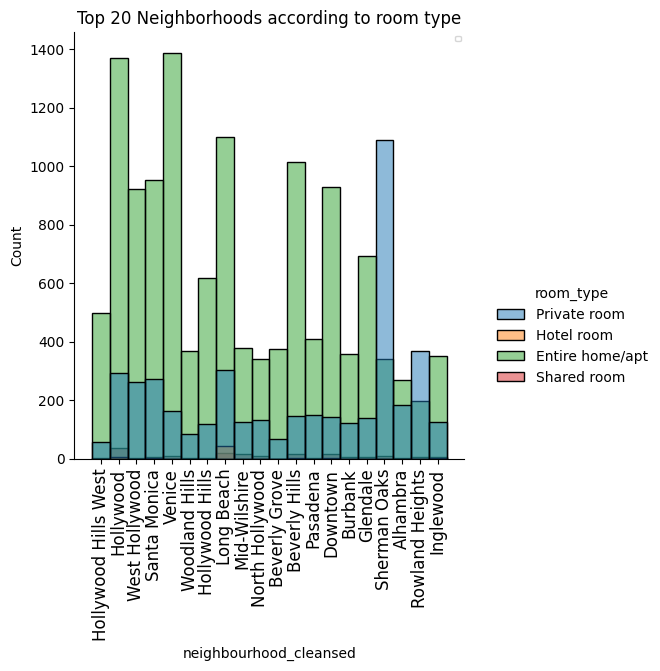

In [90]:
# Room Location Specific
# This variales has no null value
print("Total Null Value of 'room_type':", df_listing.neighbourhood_cleansed.isnull().sum())
# There are two many distinct neighbourhoods in data, we only choose top 20 neighbourhoods 
display(df_listing.neighbourhood_cleansed.value_counts().to_frame().head(20))
top_50_neighbourhoods = df_listing.neighbourhood_cleansed.value_counts()[:20].index.tolist()
df_top_50_neighbourhoods = df_listing.loc[df_listing.neighbourhood_cleansed.isin(top_50_neighbourhoods)]
plt.figure(figsize=(20, 15))
g = sns.displot(data = df_top_50_neighbourhoods, x='neighbourhood_cleansed', 
            hue = 'room_type', kind = 'hist')
g.set_xticklabels(rotation = 90)
plt.legend(fontsize = 5)
plt.xticks(fontsize = 12)
plt.title('Top 20 Neighborhoods according to room type')


Analysis: 
- From the picture, we could find that Airbnb provided by host are most locate on Hollywood, Venice, Long Beach, and Sherman Oaks, which are all representative popular areas in Los Angeles. 
- In these four neighbourhoods, only Sherman Oaks Airbnb are most of Priate room, we infer that it may because Sherman Oaks belongs to the affluent area of Los Angeles, with high prices and housing prices. In this case, the host will consider the economic factors of the ueser, and renting a single room will make the user not afford too much fee than the entire Airbnb.
- In the top 20 neighbourhoods, it could be seen that most room type of Airbnb is Entire home or apartment. Based on this, we could know Los Angeles is a very famous tourist city, people come to here enojoy their travel experience and in order to ensure a good quality experience, they are willing to choose entire Airbnb which makes them relax better.

##### Host Service Quality: The host who own more Airbnb may have a lower reponse rate and longer reponse time?

count    20692.000000
mean         3.548569
std         49.085690
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       4573.000000
Name: host_listings_count, dtype: float64

<AxesSubplot: xlabel='host_listings_count'>

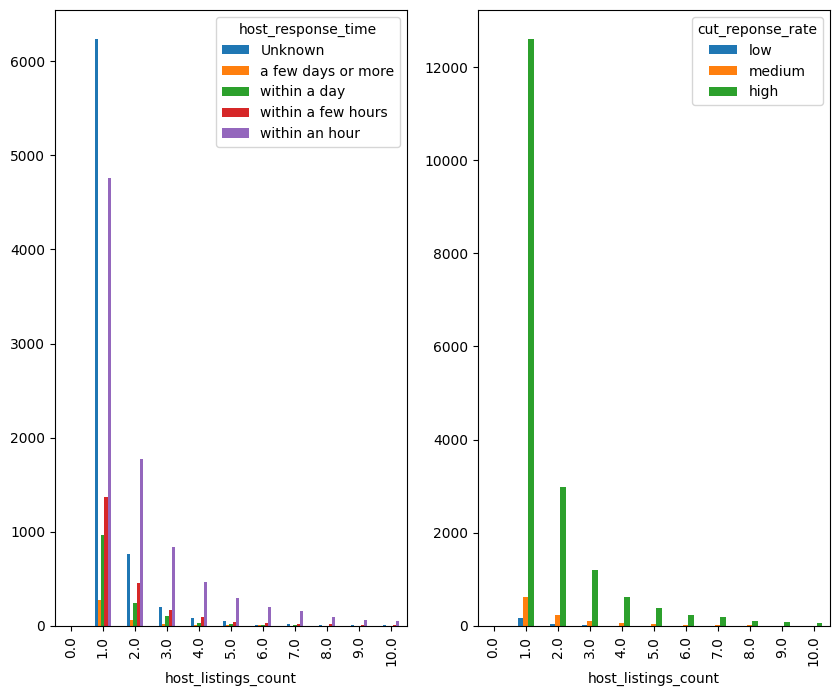

In [91]:
import copy
from copy import deepcopy
# Some Airbnb are from a same host, some we need to delete the duplicate data
df_listing_delete = deepcopy(df_listing)
df_listing_delete.drop_duplicates(subset=['host_id'], keep='first', inplace=True)
# Fill host_listings_count null by median value
df_listing_delete.host_listings_count.fillna(df_listing.host_listings_count.median(), inplace=True)
df_listing_delete.host_listings_count.isnull().sum()
display(df_listing_delete.host_listings_count.describe())
# Ignore the host who have listings greater than 10(very small propotion)
df_listing_delete = df_listing_delete[df_listing_delete.host_listings_count <= 10]
# Convert host_response_rate to double format
# df_listing_delete['host_response_rate_convert'] = df_listing_delete.host_response_rate.str.strip('%').astype(float) / 100
# df_listing_delete['host_response_rate_convert']
# Fill host_listings_count null by mean value
# df_listing_delete.host_response_rate_convert.fillna(df_listing_delete.host_response_rate_convert.mean(), inplace=True)
# Cut response rate, the rate lower than 0.5 is low, no less than 0.5 and lower than 0.9 is medium, and greater than 0.9 is high
# df_listing_delete['cut_reponse_rate'] = pd.cut(df_listing_delete['host_response_rate_convert'], bins = [0, 0.5, 0.9, 1], labels=['low', 'medium', 'high'])

# Plot
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 8))
df_listing_delete.groupby(['host_listings_count', 'host_response_time']).size().unstack().plot(kind="bar", ax = ax1) 
df_listing_delete.groupby(['host_listings_count', 'cut_reponse_rate']).size().unstack().plot(kind="bar", ax = ax2) 

- In the data, we not consider the extreme value(the host who has more than 10 lsitings). The mean is too high that is significantly influenced by extreme value, but the 50 percentile is only 1 and 75 percentile is 2, which means most of hosts only have 1-2 Airbnb.
- It could be seen that no matter the host has low or great number of listings, most of them could repeat users in tima and have very significant response efficiency.

#### User View

##### How could an user find the Airbnb they want?

0

city scrape        33117
previous scrape     7321
Name: source, dtype: int64

Text(0.5, 1.0, 'Listing Sources seached by Users')

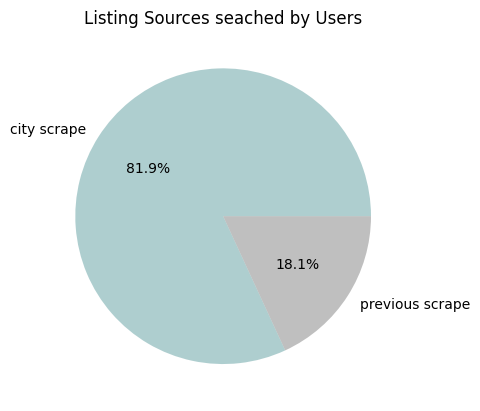

In [10]:
display(df_listing.source.isnull().sum())
display(df_listing.source.value_counts())
fig, ax = plt.subplots()
ax.pie(df_listing.source.value_counts().values, labels = df_listing.source.value_counts().index, 
        autopct='%1.1f%%', colors = ['cadetblue', 'grey'], wedgeprops={'alpha': 0.5})
plt.title('Listing Sources seached by Users')

- "city scrape " means that the listing was found by searching the city, while "previous scrape" means that the listing was seen in another scrape performed in the last 65 days, and the listing was confirmed to be still available on the Airbnb site.
- From the picture, we could know that most of users find an Airbnb by search the city it locates and other search is the source of history record.

##### Is an Airbnb with more amenities has higher price? What about other facors?

In [11]:
display(df_listing.amenities.isnull().sum())
display(df_listing.price.isnull().sum())
display(df_listing.neighbourhood_group_cleansed.isnull().sum())
display(df_listing.room_type.isnull().sum())
display(df_listing.reviews_per_month.isnull().sum())
# Process amenities: count the number of amenity every listng provide
# temp_count = []
# count_amenitites = []
# for listing in df_listing.amenities:
#     temp_count = 0
#     temp = listing.split(",")
#     for amenity in temp:
#         temp_count += 1
#     count_amenitites.append(temp_count)
# Process price, remove '$' and convert to float format
# price_convert = df_listing.price.replace("$", "")
# Concat all data
# price_convert = df_listing.price.str.replace("$", "").str.replace(",", "").astype(float)
# price_convert.describe()
df_price = pd.DataFrame({'count_amenities': count_amenitites, 
                         'price': df_listing['price'],
                         'room_type': df_listing.room_type,
                         'reviews_per_month': df_listing.reviews_per_month,
                         'neighbourhood': df_listing.neighbourhood_group_cleansed})
# There too many null value in reviews_per_month, it is hard to fill in, 
# so we ignore all the data whose reviews_per_month is null
display(df_price.reviews_per_month.isnull().sum())
df_price = df_price.dropna(subset=['reviews_per_month'])
df_price = df_price[df_price.price <= 1000]
df_price 

0

0

0

0

10585

10585

,count_amenities,price,room_type,reviews_per_month,neighbourhood
1,25,46.0,Private room,0.71,City of Los Angeles
2,16,140.0,Entire home/apt,4.80,Other Cities
3,37,340.0,Entire home/apt,0.14,City of Los Angeles
4,24,115.0,Entire home/apt,0.01,Other Cities
5,79,118.0,Private room,0.37,City of Los Angeles
...,...,...,...,...,...
39956,37,92.0,Entire home/apt,1.00,Other Cities
39981,27,260.0,Entire home/apt,1.00,Unincorporated Areas
40000,47,656.0,Entire home/apt,1.00,Unincorporated Areas
40082,12,35.0,Private room,1.00,Unincorporated Areas


Text(0.5, 1.0, 'Price vs Room Type')

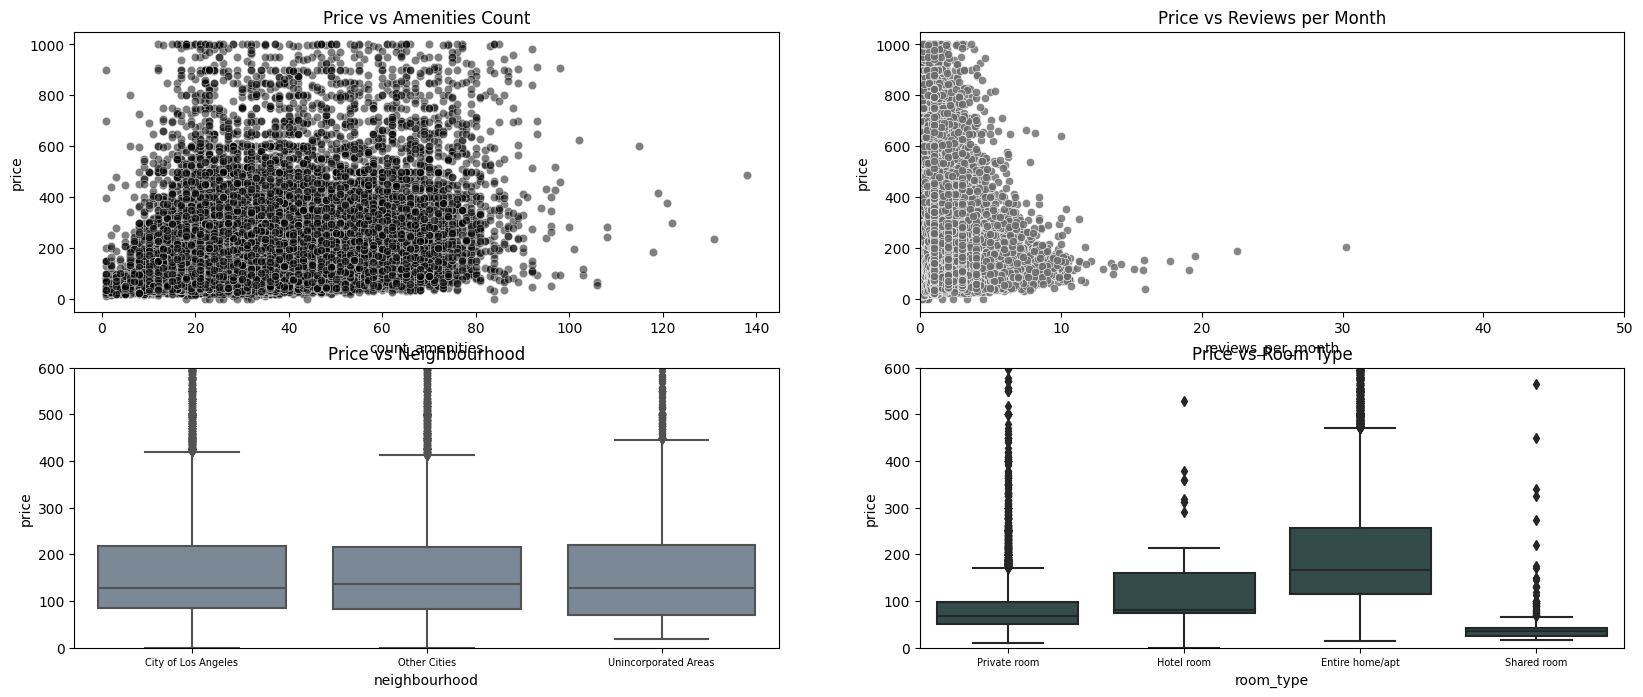

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 8))
sns.scatterplot(ax = ax1, x = 'count_amenities', y = 'price', data = df_price, alpha = 0.5, color = 'Black')
ax1.set_title("Price vs Amenities Count")
sns.scatterplot(ax = ax2, x = 'reviews_per_month', y = 'price', data = df_price, alpha = 0.8, color = 'DimGray')
ax2.set_title("Price vs Reviews per Month")
ax2.set_xlim(0, 50)
sns.boxplot(ax = ax3, x = 'neighbourhood', y = 'price', data = df_price, color = 'LightSlateGray')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 0, fontsize = 7)
ax3.set_ylim(0, 600)
ax3.set_title("Price vs Neighbourhood")
sns.boxplot(ax = ax4, x = 'room_type', y = 'price', data = df_price, color = 'DarkSlateGray')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation = 0,fontsize = 7)
ax4.set_ylim(0, 600)
ax4.set_title("Price vs Room Type")

- In the first picture, it could be seen that the number of amentites that Airbnb provide has no obvious impact on Airbnb price.
- In the second picture, it is hard to see reviews per month has influence has impact on price when the number of review is below than 10, but when the number of review greater than 15, the price is relatively low. We guess this is because the low price Airbnb is a good choice public.
- In the third picture, the location of Airbnb has no significant influence on price. The price uniformly distributes of all possible locations.
- In the fourth picture, it is very obivous that Entire home or apartment has highest average price than other room type, then the price from high to low are Hotel room, Private room and Shared room.

In [13]:
# from scipy.stats import pearsonr, ttest_ind
# corr1, p_value1 = pearsonr(df_price['count_amenities'], df_price['price'])
# corr2, p_value2 = pearsonr(df_price['reviews_per_month'], df_price['price'])
# print('Pearson correlation coefficient:', corr1)
# print('p-value:', p_value1)
# print('Pearson correlation coefficient:', corr1)
# print('p-value:', p_value1)
# from scipy.stats import f_oneway
# f_statistic1, p_value1 = f_oneway(df_price['price'], df_price['neighbourhood'])
# f_statistic2, p_value2 = f_oneway(df_price['price'], df_price['room_type'])
# print('F-statistic:', f_statistic1)
# print('p-value:', p_value1)
# print('Pearson correlation coefficient:', corr2)
# print('p-value:', p_value2)

### NLP

In [14]:
# pip install textblob

In [15]:
# pip install nltk

In [16]:
# pip install wordcloud

In [17]:
df_reviews = pd.read_csv('reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...
2,206662,780773,2011-12-12,1465676,Orlando,"Kevin is great Host, the apartment is clean an..."
3,206662,791960,2011-12-18,1465676,Orlando,"Excellent Host and excellent place, clean and ..."
4,206662,932852,2012-02-20,1559443,Nadine,I had a wonderful stay here and felt at home. ...


#### Reviews Data Process

In [18]:
# 1. Drop unuseful data
df_reviews.drop(['reviewer_name', 'id'], axis = 1, inplace = True)
# 2. Drop null value
display(df_reviews.isnull().sum())
df_reviews.dropna(inplace = True)
display(df_reviews.isnull().sum())
# 3. Convert 'date' into date time format
df_reviews['date'] = pd.to_datetime(df_reviews['date'])
# 4. Delete symbol of every comment
import re
def remove_symbols(text):
    if not isinstance(text, str):
        return ''
    return re.sub(r'[^\w\s]', '', text)
df_reviews['comments'] = df_reviews['comments'].apply(remove_symbols)

listing_id       0
date             0
reviewer_id      0
comments       250
dtype: int64

listing_id     0
date           0
reviewer_id    0
comments       0
dtype: int64

In [19]:
df_reviews.head()

,listing_id,date,reviewer_id,comments
0,109,2011-08-15,927861,The host canceled my reservation the day befor...
1,109,2016-05-15,22509885,Me and two friends stayed for four and a half ...
2,206662,2011-12-12,1465676,Kevin is great Host the apartment is clean and...
3,206662,2011-12-18,1465676,Excellent Host and excellent place clean and c...
4,206662,2012-02-20,1559443,I had a wonderful stay here and felt at home K...


#### Visualization

In [20]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\APPLE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\APPLE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\APPLE\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [21]:
# 1. Merge all comments together, the function of join is faster than for loop
all_comments = ''.join(df_reviews.comments)

In [22]:
# 2. Based on 1, select adjective words in all comments.
word_tags = pos_tag(word_tokenize(all_comments))
adjective_words = [word.lower() for word, tag in word_tags if tag.startswith('JJ')]

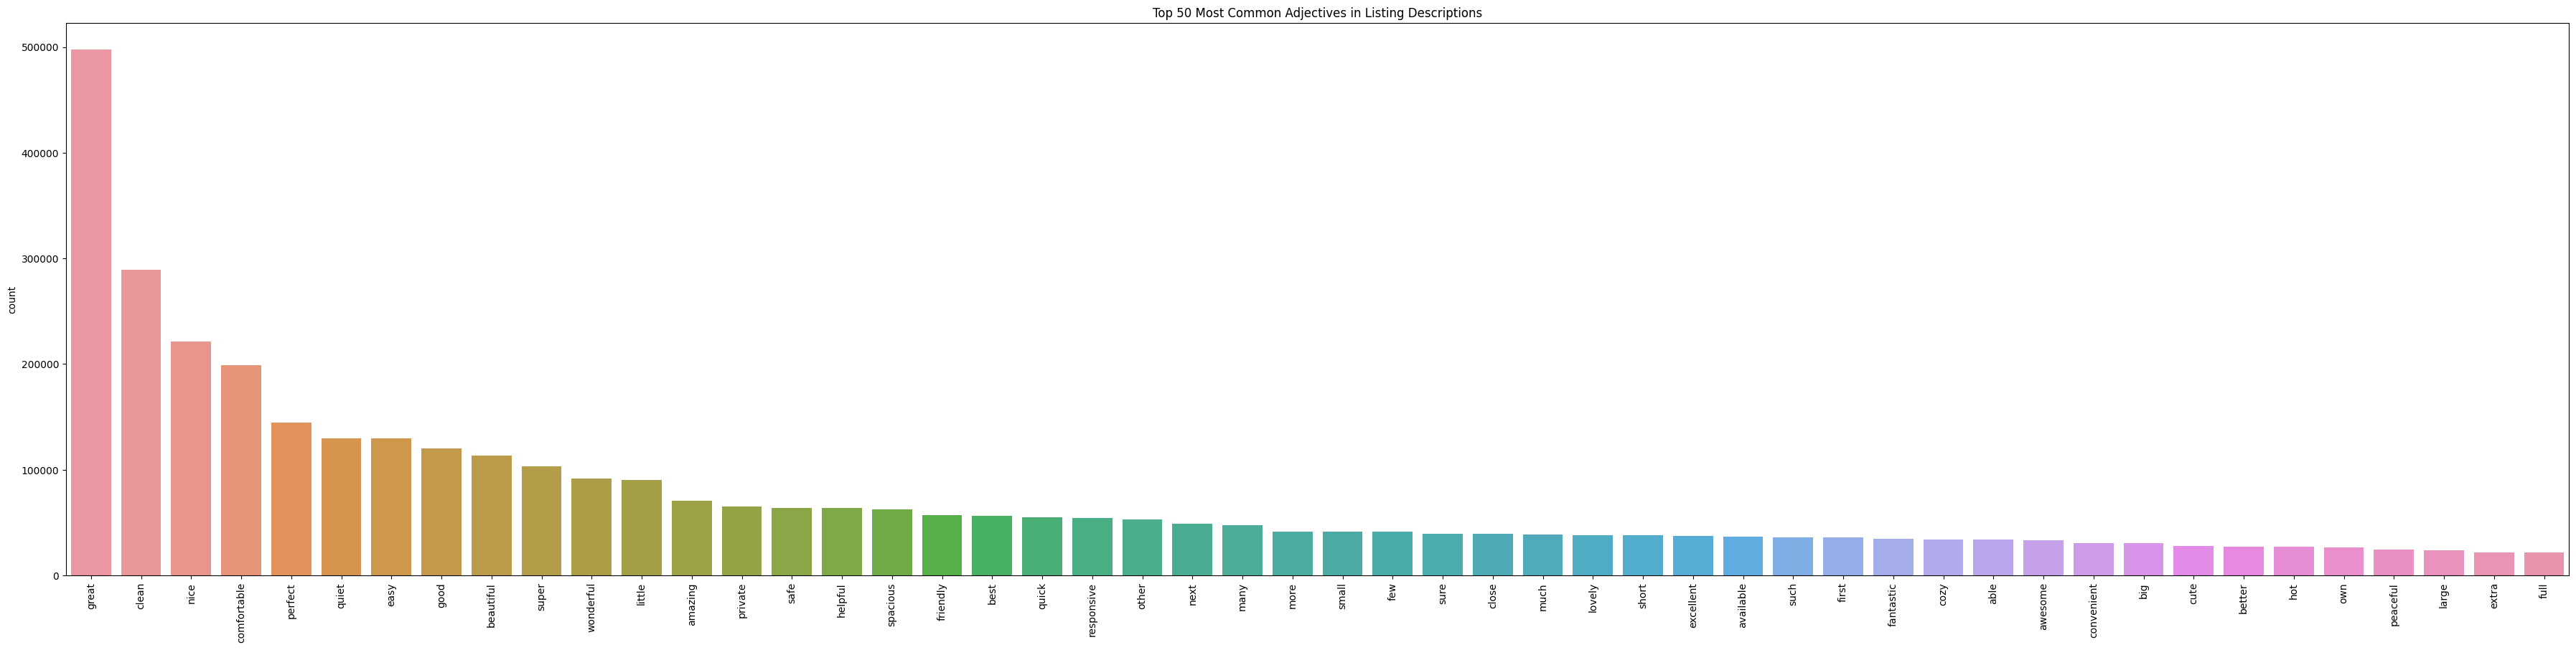

In [25]:
# 3. select top 50 adjective words
pd.Series(adjective_words).value_counts().head(5)
# 4. Visualize 3.
plt.figure(figsize = (45,10))
sns.countplot(x = adjective_words, order = pd.Series(adjective_words).value_counts().head(50).index)
plt.xticks(rotation = 90)
plt.title('Top 50 Most Common Adjectives in Listing Descriptions')
plt.show()

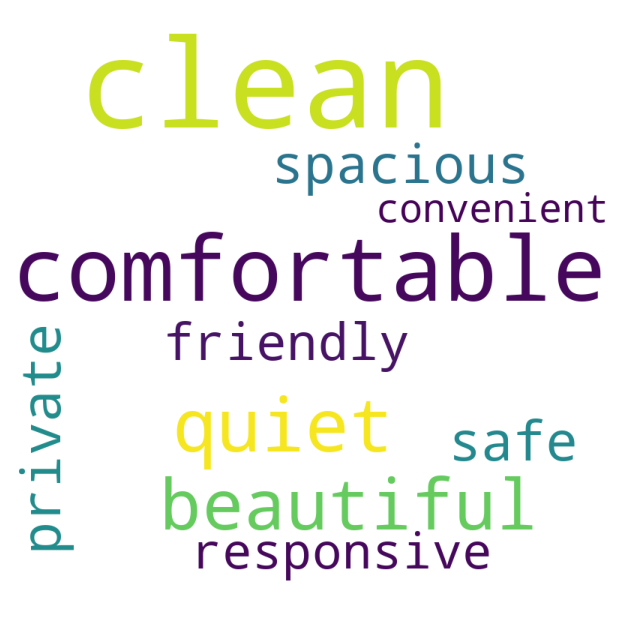

In [27]:
# 5. Word Cloud 
from wordcloud import WordCloud
user_requirements = pd.Series(adjective_words).value_counts().head(50)[[1, 3, 5, 8, 13, 14, 16, 17, 20, 40 ]]
user_requirements = dict(user_requirements)
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'white', 
                      min_font_size = 10).generate_from_frequencies(user_requirements)
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

#### Sentiment Analysis

In [28]:
# TextBlob provides the sentient attribute, which can be used to calculate the 
# emotional polarity of text and return a tuple composed of polarity values and 
# subjective values. The polarity value is between -1 (completely negative) and 
# 1 (completely positive).
from textblob import TextBlob
def get_sentiment_polarity(comment):
    return TextBlob(comment).sentiment.polarity
df_reviews['sentiment_polarity'] = df_reviews['comments'].apply(get_sentiment_polarity)
df_reviews['sentiment_polarity'].describe()

count    1.356931e+06
mean     4.102974e-01
std      2.186076e-01
min     -1.000000e+00
25%      2.833333e-01
50%      4.000000e-01
75%      5.333333e-01
max      1.000000e+00
Name: sentiment_polarity, dtype: float64

### Combine two datasets

In [53]:
# 1. Rename
df_listing.head()
df_listing['listing_id'] = df_listing['id']
df_listings = df_listing.drop(columns = ['id'])
# 2. Group by 
df_reviews_groupby = df_reviews.groupby('listing_id')['sentiment_polarity'].mean().to_frame()
# 3. Merge
df = pd.merge(df_listing, df_reviews_groupby, on = 'listing_id')
df.head()
# 4.
df_select = df.drop(['id', 'source', 'host_id', 'host_name', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'neighbourhood_cleansed',
       'neighbourhood_group_cleansed',
       'property_type', 'first_review', 'last_review',
       'cut_reponse_rate', 'listing_id','bathrooms'], axis = 1)
df_select.head()

,host_listings_count,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_response_time_cate,host_response_rate_convert,sentiment_polarity
0,1.0,34.10420,-118.34748,Private room,1,1 shared bath,1.0,2.0,"[""TV with standard cable"", ""Hot water"", ""First...",46.0,...,4.76,4.89,4.92,4.92,4.87,f,0.71,within a few hours,0.750000,0.415747
1,2.0,34.00985,-118.40798,Entire home/apt,3,1 bath,1.0,1.0,"[""Wifi"", ""Free street parking"", ""Full kitchen""...",140.0,...,4.91,4.94,4.94,4.91,4.87,f,4.80,within a day,0.940000,0.415726
2,2.0,34.05303,-118.39449,Entire home/apt,8,3 baths,3.0,5.0,"[""Private entrance"", ""TV with standard cable"",...",340.0,...,4.50,4.93,4.93,4.43,4.64,f,0.14,Unknown,0.961604,0.428450
3,1.0,33.98301,-118.38607,Entire home/apt,6,2 baths,2.0,3.0,"[""TV with standard cable"", ""First aid kit"", ""F...",115.0,...,5.00,3.00,4.00,5.00,4.00,f,0.01,Unknown,0.961604,0.153333
4,2.0,34.09625,-118.34605,Private room,1,1 shared bath,1.0,1.0,"[""Indoor fireplace: gas"", ""Shower gel"", ""Dishe...",118.0,...,4.92,5.00,4.97,4.97,4.87,t,0.37,within an hour,1.000000,0.458367


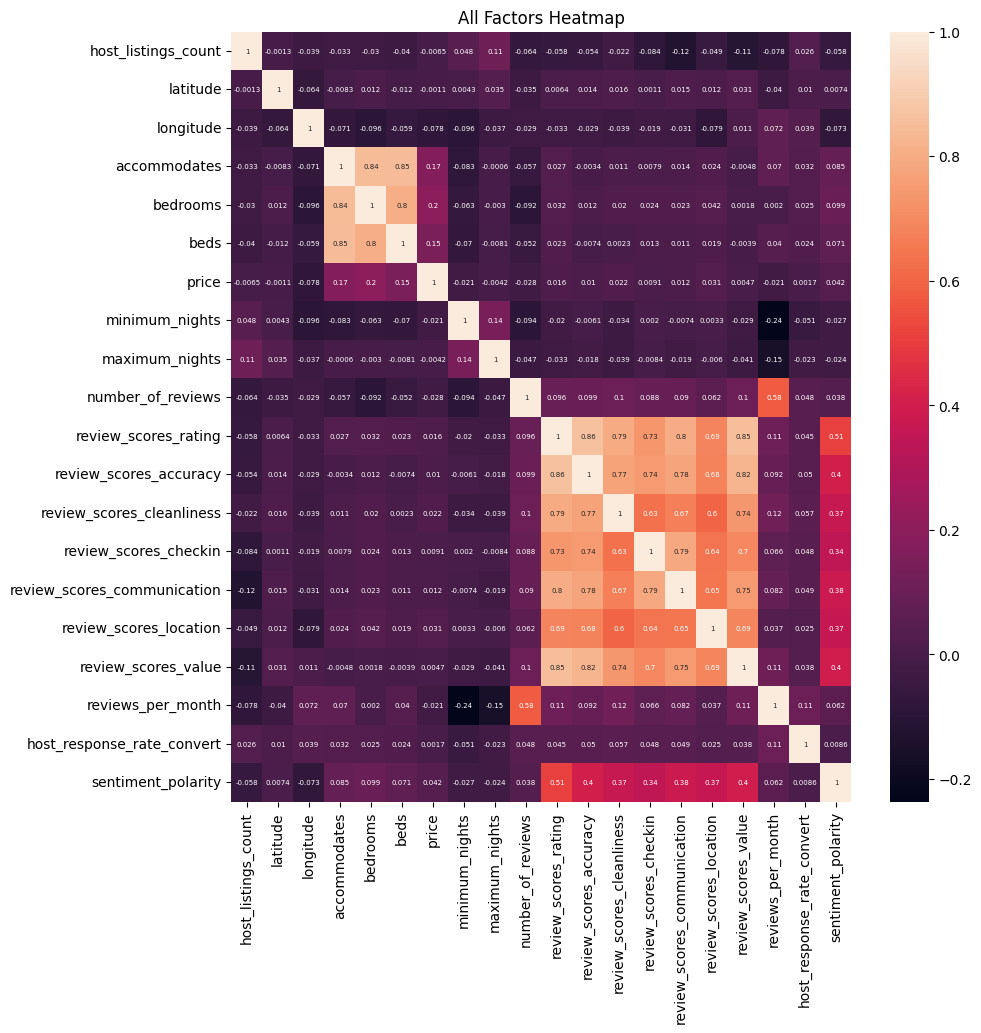

In [86]:
# Visualize distribution of data and correlation between every variables
corr = df_select.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True, ax=ax, annot_kws={'fontsize': 5})
ax.set_title('All Factors Heatmap')
plt.show()


#### Users Behavior Analysis

#### Select useful variables

In [57]:
df_behavior = df_select[['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','sentiment_polarity']]
df_behavior.head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,sentiment_polarity
0,4.82,4.80,4.76,4.89,4.92,4.92,4.87,0.415747
1,4.92,4.95,4.91,4.94,4.94,4.91,4.87,0.415726
2,4.57,4.57,4.50,4.93,4.93,4.43,4.64,0.428450
3,4.00,5.00,5.00,3.00,4.00,5.00,4.00,0.153333
4,4.84,4.82,4.92,5.00,4.97,4.97,4.87,0.458367


#### Apply statistics analysis

In [61]:
df_behavior

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,sentiment_polarity
0,4.82,4.80,4.76,4.89,4.92,4.92,4.87,0.415747
1,4.92,4.95,4.91,4.94,4.94,4.91,4.87,0.415726
2,4.57,4.57,4.50,4.93,4.93,4.43,4.64,0.428450
3,4.00,5.00,5.00,3.00,4.00,5.00,4.00,0.153333
4,4.84,4.82,4.92,5.00,4.97,4.97,4.87,0.458367
...,...,...,...,...,...,...,...,...
29847,5.00,5.00,5.00,5.00,5.00,4.00,5.00,0.370833
29848,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.500000
29849,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.516667
29850,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.500000


In [73]:
df_behavior.iloc[:, 1:7]

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,4.80,4.76,4.89,4.92,4.92,4.87
1,4.95,4.91,4.94,4.94,4.91,4.87
2,4.57,4.50,4.93,4.93,4.43,4.64
3,5.00,5.00,3.00,4.00,5.00,4.00
4,4.82,4.92,5.00,4.97,4.97,4.87
...,...,...,...,...,...,...
29847,5.00,5.00,5.00,5.00,4.00,5.00
29848,5.00,5.00,5.00,5.00,5.00,5.00
29849,5.00,5.00,5.00,5.00,5.00,5.00
29850,5.00,5.00,5.00,5.00,5.00,5.00


In [79]:
display(df_behavior.isnull().sum())
for col in range(1,8):
    df_behavior.iloc[:, col].fillna(df_behavior.iloc[:, col].mean(), inplace = True)
display(df_behavior.isnull().sum())


review_scores_rating             0
review_scores_accuracy         255
review_scores_cleanliness      254
review_scores_checkin          261
review_scores_communication    255
review_scores_location         263
review_scores_value            266
sentiment_polarity               0
dtype: int64

review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
sentiment_polarity             0
dtype: int64

In [80]:
import scipy.stats as stats
# perform Pearson correlation test between sentiment_polarity and each variable
for col in df_behavior.columns[:-1]:
    correlation, pvalue = stats.pearsonr(df_behavior[col], df_behavior['sentiment_polarity'])
    if pvalue < 0.05:
        print(f"There is a significant positive correlation between {col} and sentiment_polarity (p-value: {pvalue:.4f})")
    else:
        print(f"There is no significant correlation between {col} and sentiment_polarity (p-value: {pvalue:.4f})")


There is a significant positive correlation between review_scores_rating and sentiment_polarity (p-value: 0.0000)
There is a significant positive correlation between review_scores_accuracy and sentiment_polarity (p-value: 0.0000)
There is a significant positive correlation between review_scores_cleanliness and sentiment_polarity (p-value: 0.0000)
There is a significant positive correlation between review_scores_checkin and sentiment_polarity (p-value: 0.0000)
There is a significant positive correlation between review_scores_communication and sentiment_polarity (p-value: 0.0000)
There is a significant positive correlation between review_scores_location and sentiment_polarity (p-value: 0.0000)
There is a significant positive correlation between review_scores_value and sentiment_polarity (p-value: 0.0000)


#### Output sample data(both of dataset is larger than 10M)

In [93]:
df_listing_sample = df_listing.head(100)
df_reviews_sample = df_reviews.head(100)
df_listing_sample.to_csv('listing_sample.csv')
df_reviews_sample.to_csv('reviews_sample.csv')